# ASSIGNMENT 1 EE:240 PATTERN RECOGNITION AND MACHINE LEARNING
  *NAME: NITYASH GAUTAM*
  
  *SID: 862395403*

  *UCR Email: ngaut006@ucr.edu*


## 1.1

### 1.1 (a)

The μ for all the three coins will be 0.5. (Since, all three of them are fair)

### 1.1 (b)

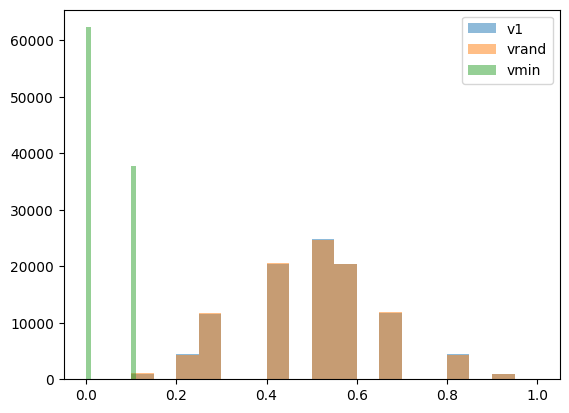

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

n_coins = 1000
n_flips = 10

n_runs = 100000

v1 = np.zeros(n_runs)
vrand = np.zeros(n_runs)
vmin = np.zeros(n_runs)

for i in range(n_runs):

    flips = np.random.randint(2, size=(n_coins, n_flips))
    n_heads = np.sum(flips, axis=1)
    
    v1[i] = n_heads[0] / n_flips
    rand_coin = random.randint(0, n_coins - 1)
    vmin_coin = np.argmin(n_heads)
    vmin[i] = n_heads[vmin_coin] / n_flips
    vrand[i] = n_heads[rand_coin] / n_flips

plt.hist(v1, bins=20, alpha=0.5, label='v1')
plt.hist(vrand, bins=20, alpha=0.5, label='vrand')
plt.hist(vmin, bins=20, alpha=0.5, label='vmin')
plt.legend()
plt.show()

### 1.1 (c)

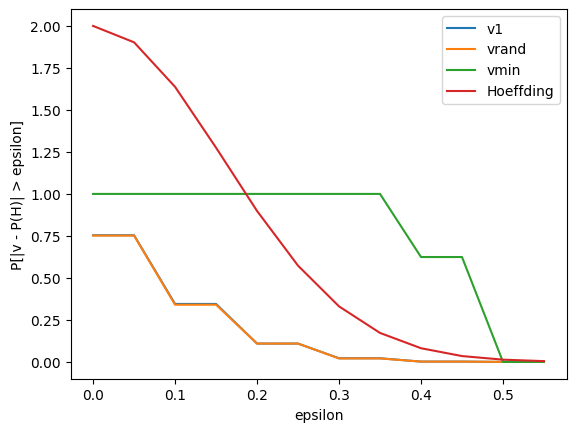

In [2]:
epsilons = np.arange(0, 0.6, 0.05)

p1 = np.zeros(len(epsilons))
prand = np.zeros(len(epsilons))
pmin = np.zeros(len(epsilons))

for i in range(n_runs):
    flips = np.random.randint(2, size=(n_coins, n_flips))
    n_heads = np.sum(flips, axis=1)
    
    v1[i] = n_heads[0] / n_flips
    rand_coin = random.randint(0, n_coins - 1)
    vmin_coin = np.argmin(n_heads)
    vmin[i] = n_heads[vmin_coin] / n_flips
    vrand[i] = n_heads[rand_coin] / n_flips

for i, epsilon in enumerate(epsilons):
    p1[i] = np.mean(np.abs(v1 - 0.5) > epsilon)
    prand[i] = np.mean(np.abs(vrand - 0.5) > epsilon)
    pmin[i] = np.mean(np.abs(vmin - 0.5) > epsilon)

hoeffding = 2 * np.exp(-2 * (epsilons**2) * n_flips)

plt.plot(epsilons, p1, label='v1')
plt.plot(epsilons, prand, label='vrand')
plt.plot(epsilons, pmin, label='vmin')
plt.plot(epsilons, hoeffding, label='Hoeffding')
plt.xlabel('epsilon')
plt.ylabel('P[|v - P(H)| > epsilon]')
plt.legend()
plt.show()


### 1.1 (d)

The *FIRST* and *RANDOM COINS* follow the Hoeffding bound. 

The coin with *MINIMUM FREQUENCY* doesn't obey Hoeffding bound. 

This is because, for the first two coins, they were chosen before the experiment. While for the last one, we flipped all the coins first, and  then used the data to determine which the coin with minimum frequency of heads.

This essentially violates the Hoeffding inequality condition as per which, which the hypothesis has been fixed before samples were drawn.

### 1.2


### 1.2 (a)


In order to find the prob that we have selected bin A, given the balls selected are red and blue; we can make use of the Baye's Theorem

$$P(A|R,B) = P(R,B|A) * \frac{P(A)}{P(R,B)}$$

P(A|R,B) => Prob that bin A is selected; given (selected balls are red and blue)

P(R,B|A) => Prob of drawing a red and a blue ball from the bin A

P(A) => Prior Prob of selecting bin A

P(R,B) => Prob of drawing a red and a blue ball, no matter which bin they're coming from

$P(R,B|A) = P(R|A) * P(B|A) = 0.3 * 0.7 = 0.21$

$P(R,B|B) = P(R|B) * P(B|B) = 0.7 * 0.3 = 0.21$

$P(A) = \frac{4}{10} = 0.4$

$P(B) = \frac{6}{10} = 0.6$

$P(R,B) = P(R,B|A) * P(A) + P(R,B|B) * P(B) = 0.21 * 0.4 + 0.21*0.6 = 0.21$


Hence, 

$$P(A|R,B) = P(R,B|A) * \frac{P(A)}{P(R,B)} = 0.21 * \frac{0.4}{0.21} = 0.4$$

*The Probability that bin A is selected, and the selected balls are red and blue = 0.4*


### 1.2 (b)

Similar Approach will be Taken as that in 1.2(a)

$$P(A|R,B) = P(R,B|A) * \frac{P(A)}{P(R,B)}$$

P(A|R,B) => Prob that bin A is selected; given (selected balls are red and blue)

P(R,B|A) => Prob of drawing a red and a blue ball from the bin A

P(A) => Prior Prob of selecting bin A

P(R,B) => Prob of drawing a red and a blue ball, no matter which bin they're coming from



$P(R,B|A) = P(R|A) * P(B|A) = 0.1 * 0.7 = 0.03$

$P(R,B|B) = P(R|B) * P(B|B) = 0.4 * 0.2 = 0.08$

$P(A) = \frac{4}{10} = 0.4$

$P(B) = \frac{6}{10} = 0.6$

$P(R,B) = P(R,B|A) * P(A) + P(R,B|B) * P(B) = 0.03 * 0.4 + 0.08*0.6 = 0.059$

Hence, 

$$P(A|R,B) = P(R,B|A) * \frac{P(A)}{P(R,B)} = 0.03 * \frac{0.4}{0.059} = 0.203$$

*The Probability that bin A is selected, and the selected balls are red and blue = 0.203*

### 1.3

$$μ_+ = \frac{1}{N_+}∑_{i:y_i = +1}x_i$$

$$μ_- = \frac{1}{N_-}∑_{i:y_i = -1}x_i$$

Distances from the mean are

$$||x-μ_+||_2^2 = ||x||_2^2 + ||μ_+||_2^2 - 2<x,μ_+>$$

$$||x-μ_-||_2^2 = ||x||_2^2 + ||μ_-||_2^2 - 2<x,μ_->$$

The decision rule for nearest mean is

$y = +1$ if $||x-μ_-||_2^2 > ||x-μ_+||_2^2$

$y = -1$ if $||x-μ_-||_2^2 < ||x-μ_+||_2^2$

Also,

$$||x - μ_-||_2^2 - ||x - μ_+||_2^2 = <w,x> +b$$

$$||x - μ_-||_2^2 - ||x - μ_+||_2^2 = 2<μ_+-μ_-, x> + ||μ_-||_2^2-||\mu_+||_2^2$$

As per the question, the model for classification is:

$y = g(x) = sign[w^Tx + b]$

$w = 2(μ_+-μ_-)$ and $b = ||μ_-||_2^2 - ||μ_+||_2^2$

Therefore,

$$w^Tx+b = ∑_{n=1}^Nα_n<x_n,x>+b$$


Source: CS171 Slides



## 1.4

### 1.4 (a)

In [3]:
# Importing necessary Libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X = mnist.data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = mnist.target
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
# Filtering out data corresponding to labels 1, 2, and 7
labels = ['1', '2', '7']
indices = np.isin(y, labels)
X_filtered = X[indices]
y_filtered = y[indices]

# Converting the labels to integers
y_filtered = y_filtered.astype(np.int)

print(X_filtered.shape, y_filtered.shape)

(22160, 784) (22160,)


<ipython-input-7-5a8cae3cbb2d>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_filtered = y_filtered.astype(np.int)


In [8]:
X_filtered

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y_filtered.unique()

array([1, 2, 7])

In [10]:
filtered_df = pd.DataFrame(X_filtered)
filtered_df['label'] = y_filtered

In [11]:
num_examples_per_class = 200

filtered_df = filtered_df.reset_index(drop=True)

X_train = []
y_train = []

for label in labels:

    label_indices = filtered_df.index[filtered_df['label'] == int(label)].tolist()
    selected_indices = np.random.choice(label_indices, num_examples_per_class, replace=False)

    X_train.append(filtered_df.loc[selected_indices, 'pixel1':'pixel784'].values)
    y_train.append(filtered_df.loc[selected_indices, 'label'].values)

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

shuffle_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

print(X_train.shape, y_train.shape)


(600, 784) (600,)


In [12]:
n_test = 50

filtered_df = filtered_df.reset_index(drop=True)

X_test = []
y_test = []

for label in labels:
    label_indices = filtered_df.index[filtered_df['label'] == int(label)].tolist()
    selected_indices = np.random.choice(label_indices, n_test, replace=False)
    X_test.append(filtered_df.loc[selected_indices, 'pixel1':'pixel784'].values)
    y_test.append(filtered_df.loc[selected_indices, 'label'].values)

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

shuffle_indices = np.random.permutation(len(X_test))
X_test = X_test[shuffle_indices]
y_test = y_test[shuffle_indices]


In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [14]:
def get_k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((i, dist))

    distances.sort(key=lambda x: x[1])
    neighbors_indices = [distances[i][0] for i in range(k)]
    return neighbors_indices

In [15]:
def classify_digit(X_train, y_train, x_test, k):
    neighbors_indices = get_k_nearest_neighbors(X_train, y_train, x_test, k)
    labels = [y_train[i] for i in neighbors_indices]
    return max(labels,key=labels.count)

In [16]:
k_values = [1, 3]

print (X_test.shape, y_test.shape)
# Function to Compute the empirical accuracy of both the classifiers
for k in k_values:
    correct = 0
    for i in range(len(X_test)):
        predicted_label = classify_digit(X_train, y_train, X_test[i], k)
        if predicted_label == y_test[i]:
            correct += 1
    accuracy = correct / len(X_test)
    print(f"Empirical Training accuracy of {k}-NN classifier: {accuracy}")

(150, 784) (150,)
Empirical Training accuracy of 1-NN classifier: 0.98
Empirical Training accuracy of 3-NN classifier: 0.98


### 1.4 (b)

(150, 784) (150,)


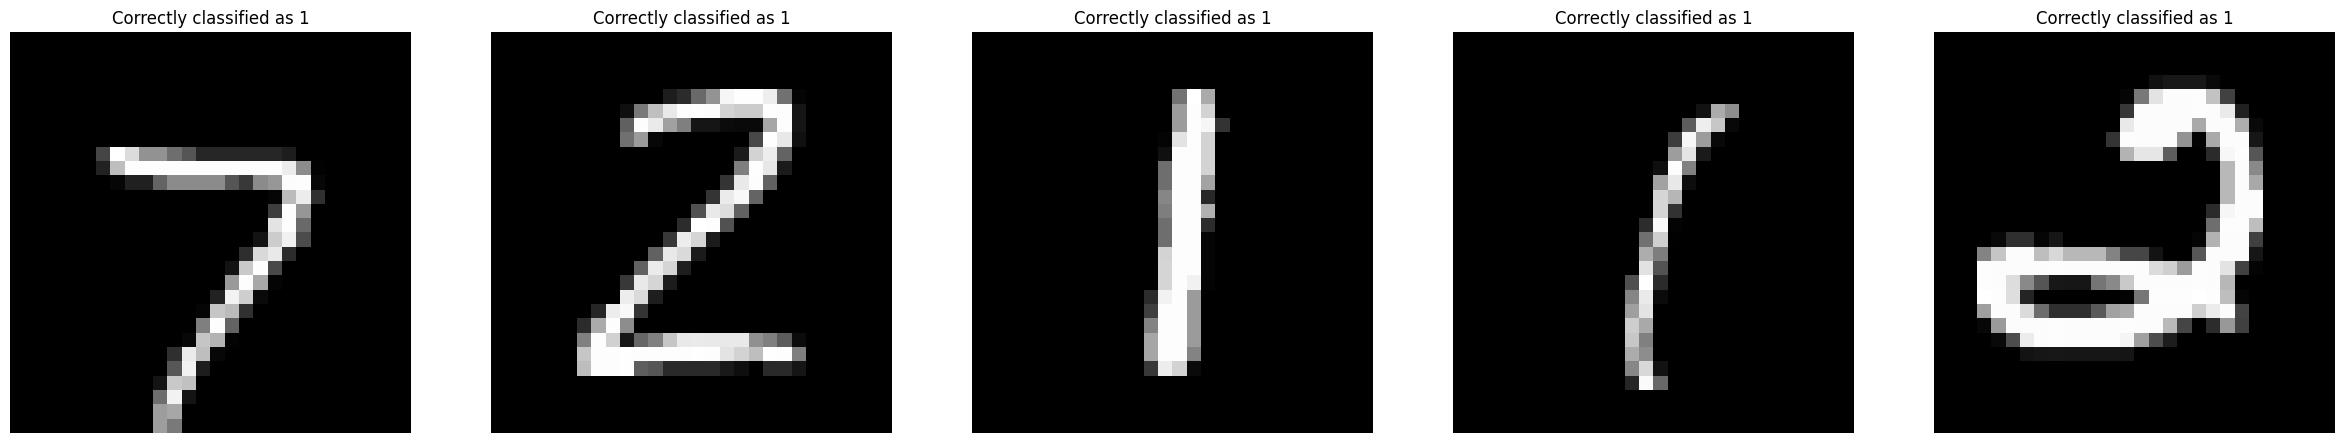

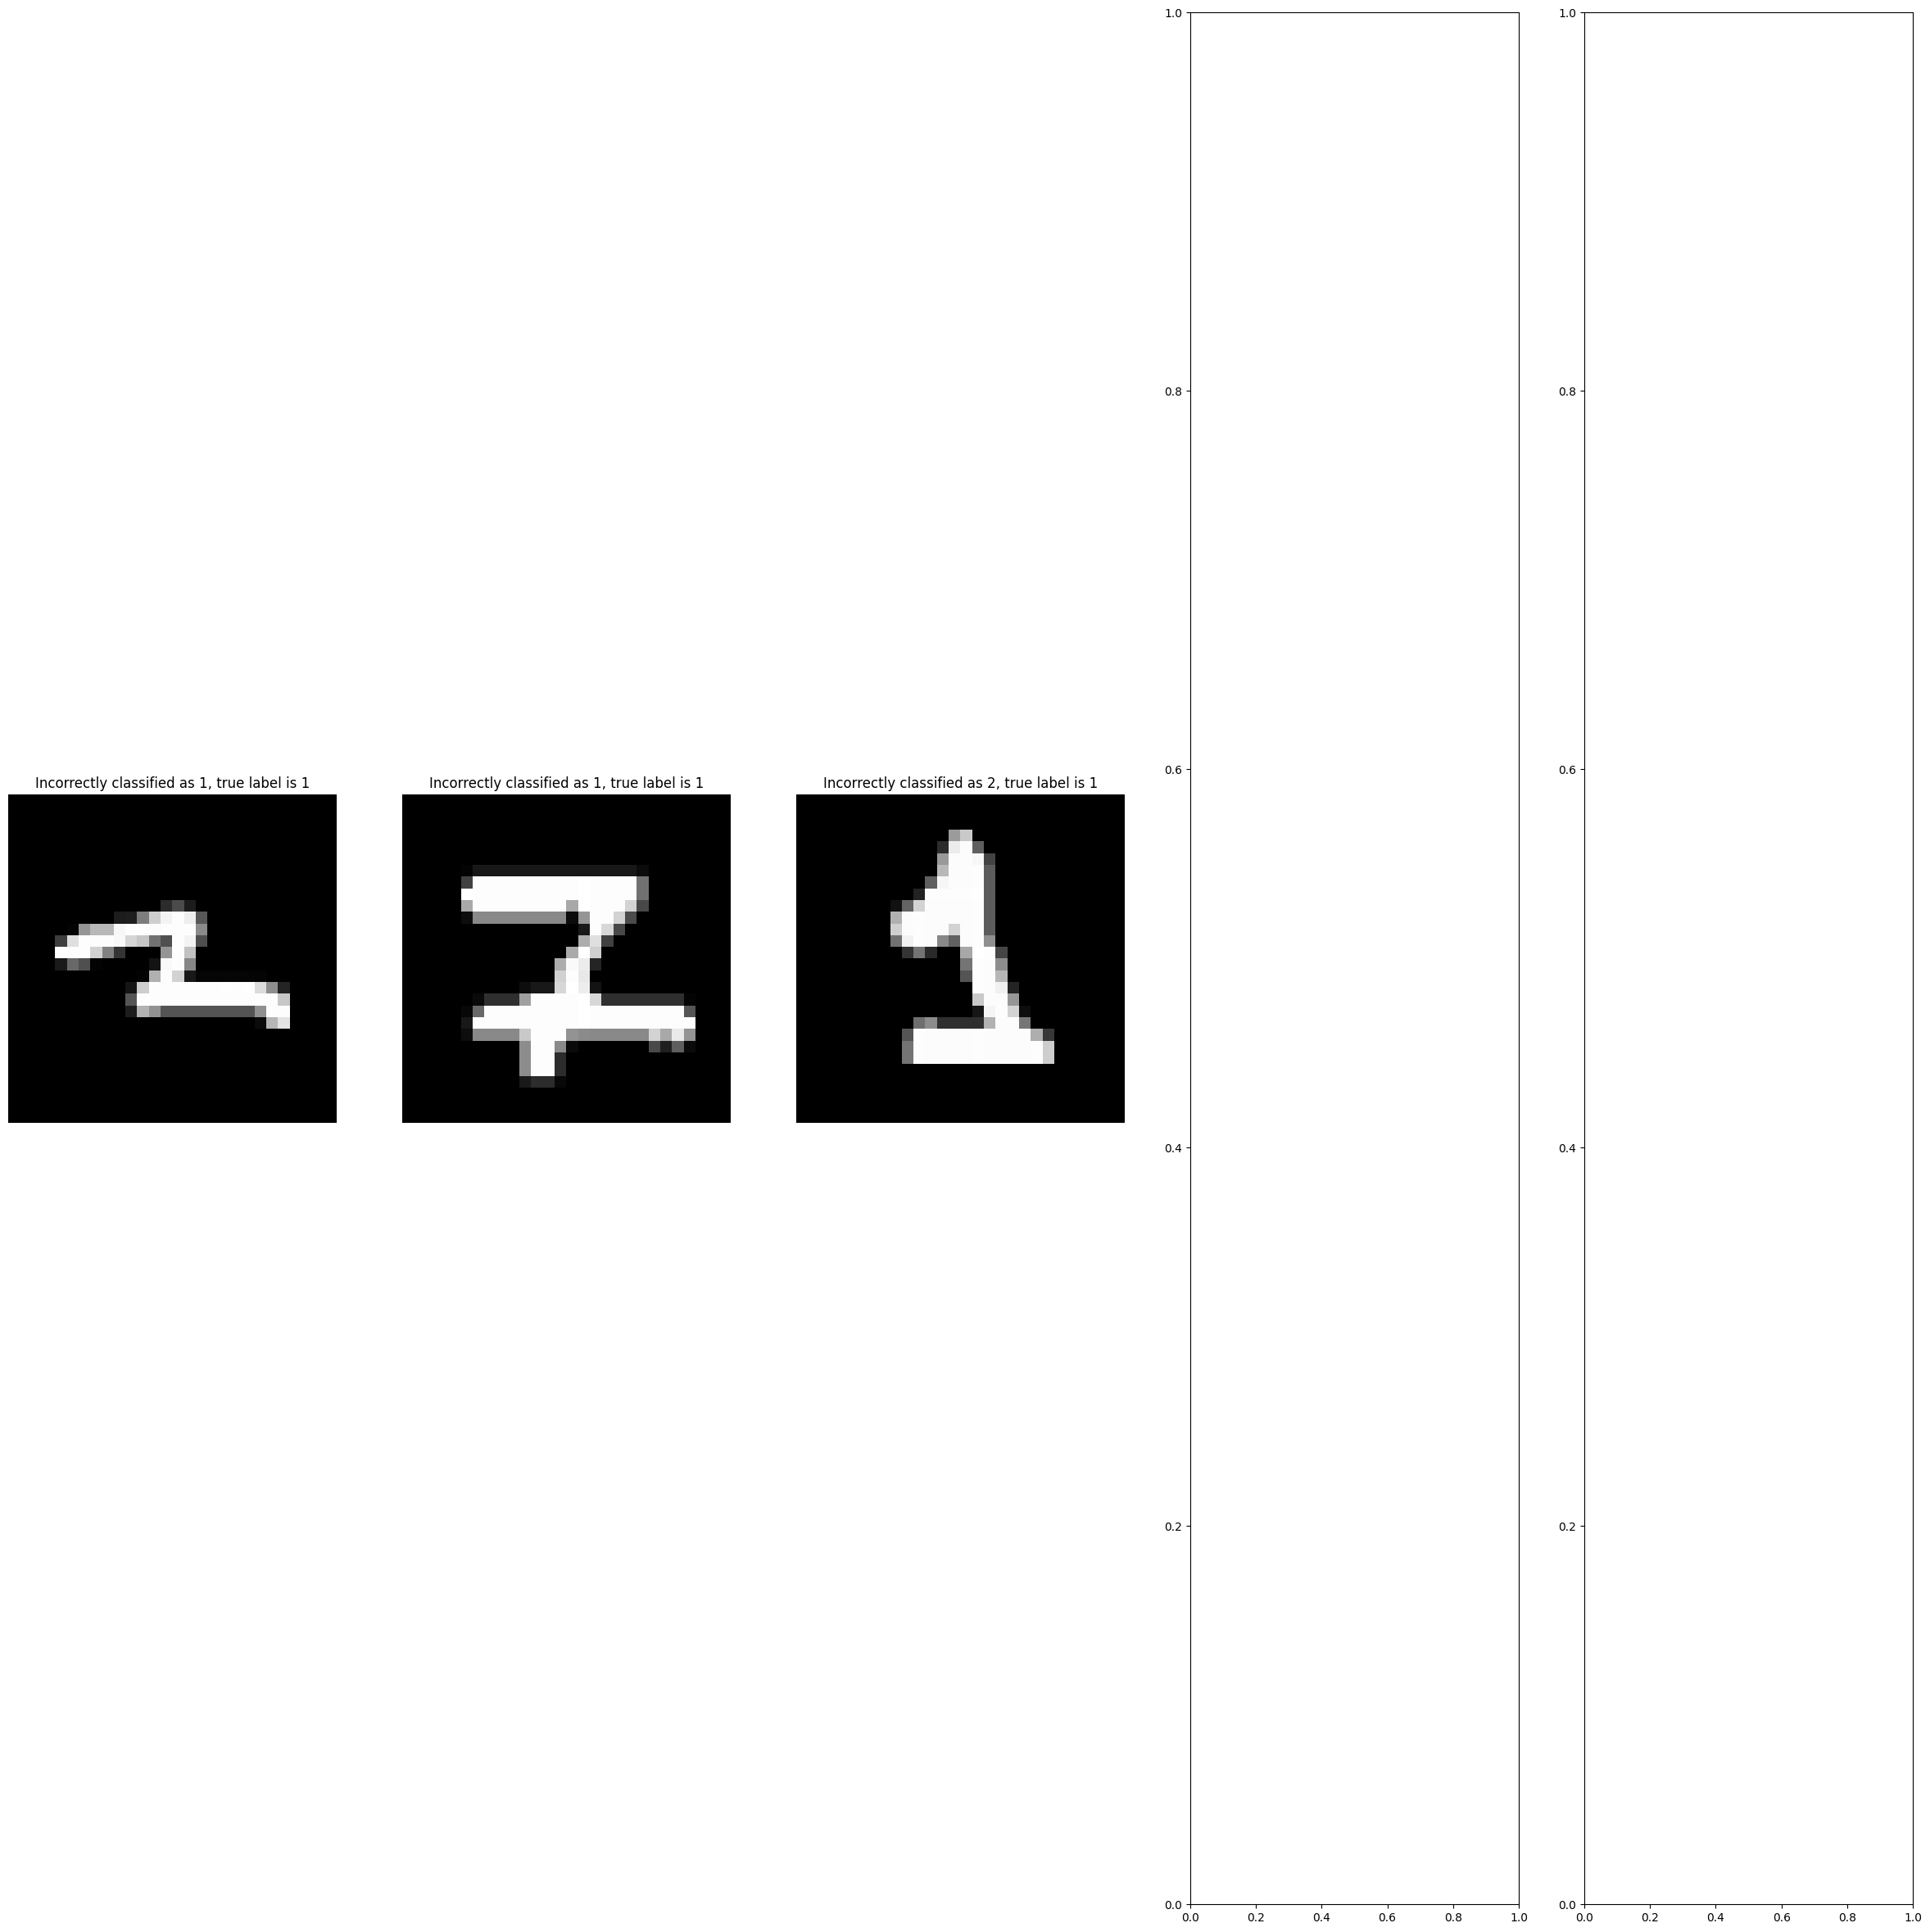

In [17]:
# Define the number of neighbors to consider
k = 1

print (X_test.shape, y_test.shape)
correct_classified = []
incorrect_classified = []
for i in range(len(X_test)):
    predicted_label = classify_digit(X_train, y_train, X_test[i], k)
    if predicted_label == y_test[i]:
          correct_classified.append(i)
    else:
          incorrect_classified.append(i)

len(correct_classified), len(incorrect_classified)

# Plot the correctly classified digits
fig, axs = plt.subplots(1, 5, figsize=(30, 30))
for i in range(min(len(correct_classified), 5)):
    axs[i].imshow(X_test[correct_classified[i]].reshape(28, 28), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(f"Correctly classified as 1")

# Plot the incorrectly classified digits
fig, axs = plt.subplots(1, 5, figsize=(30,30))
for i in range(min(len(incorrect_classified), 5)):
    axs[i].imshow(X_test[incorrect_classified[i]].reshape(28, 28), cmap="gray")
    axs[i].axis("off")
    predicted_label = classify_digit(X_train, y_train, incorrect_classified[i], k)
    axs[i].set_title(f"Incorrectly classified as {predicted_label}, true label is 1")

plt.show()

## 1.5

### 1.5 (a)

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

In [19]:
# Load CSV and columns
df = pd.read_csv("/content/drive/MyDrive/EE 240/Assignments/Datasets/Housing.csv")

In [20]:
Y = df['price']
X = df['lotsize']
X = X.values

In [21]:
X_train = X[:-250]
X_test = X[-250:]

Y_train = Y[:-250]
Y_test = Y[-250:]

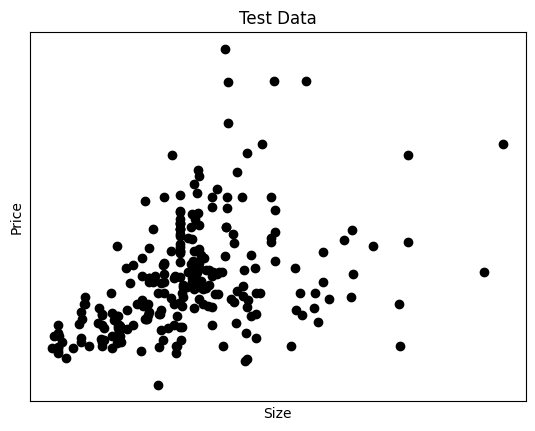

In [22]:
plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
plt.grid()
plt.show()

In [23]:
def fit_linear(x,y):
    # y = wx + b
    w = 0
    b = 0

    x_bar = sum(x) / len(x)
    y_bar = sum(y) / len(y)

    num = 0
    den = 0

    for i, j in zip(x,y):
      t1 = (i - x_bar)**2
      den = den + t1

      t2 = i - x_bar
      t3 = j - y_bar
      key = t2 * t3
      
      num = num + key
    
    w = num/den
    b = y_bar - w*x_bar
    return w, b

In [24]:
w, b = fit_linear(X,Y)
print('w = {0:5.1f}, b = {1:5.1f}'.format(w,b))

w =   6.6, b = 34136.2


In [25]:
# Getting the Prediction results on the test data
Y_predict = np.dot(X_test,w) + b

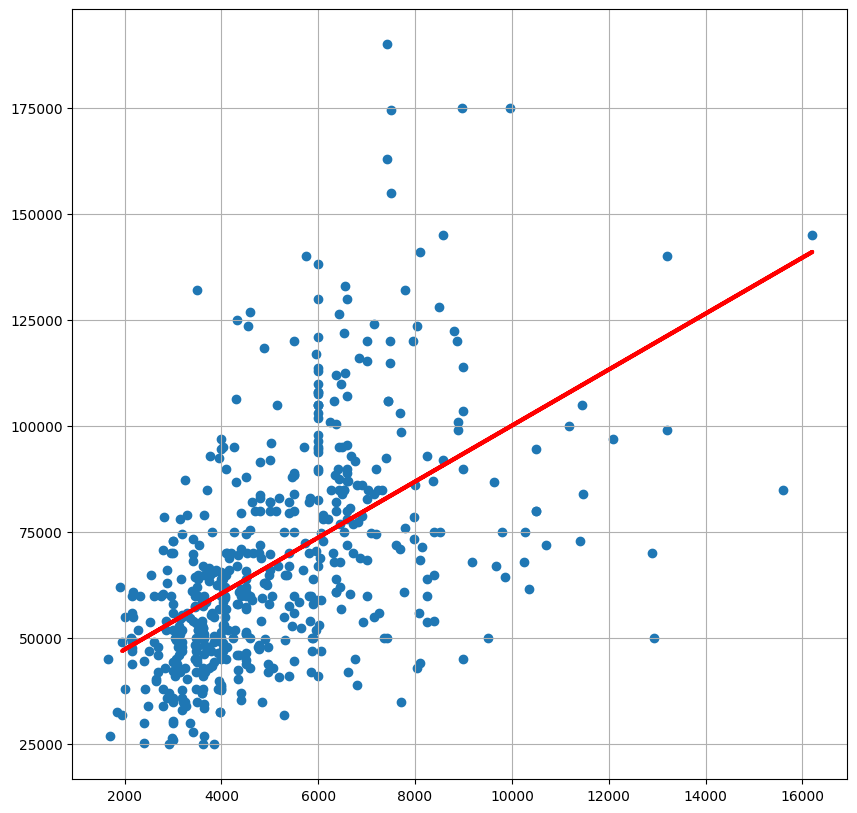

In [26]:
xp = [i for i in range(int(min(X)), int(max(X)) + 3)]
yp = [w*i +b for i in xp]

plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.plot(X_test, Y_predict, color='red',linewidth=3)
plt.grid()
plt.show()

### 1.5 (b)

In [27]:
X = np.array(df[['lotsize', 'bedrooms', 'bathrms']])
y = np.array(df['price'])

In [28]:
x_with_ones = np.ones((X.shape[0], 1))
X = np.hstack((X, x_with_ones))

In [29]:
from sklearn.model_selection import train_test_split
(Xtr, Xts, ytr, yts) = train_test_split(X,y,test_size = 0.3)

print("Shape of X and y is: ",X.shape, y.shape)
print("Shape of Training Data(X) and Training Data (y) is:" ,Xtr.shape, ytr.shape)
print("Shape of Testin Data(X) and Testing Data(y) is:" ,Xts.shape, yts.shape)

Shape of X and y is:  (546, 4) (546,)
Shape of Training Data(X) and Training Data (y) is: (382, 4) (382,)
Shape of Testin Data(X) and Testing Data(y) is: (164, 4) (164,)


In [30]:
print (Xtr.shape, Xtr.T.shape, ytr.shape)

(382, 4) (4, 382) (382,)


In [31]:
np.linalg.inv(Xtr.T @ Xtr)

array([[ 5.50533044e-10, -1.59631509e-07, -3.88376522e-07,
        -1.89433449e-06],
       [-1.59631509e-07,  6.23685260e-03, -2.99705163e-03,
        -1.37903485e-02],
       [-3.88376522e-07, -2.99705163e-03,  1.19205160e-02,
        -4.50168834e-03],
       [-1.89433449e-06, -1.37903485e-02, -4.50168834e-03,
         5.92166540e-02]])

In [32]:
w = (np.linalg.inv(Xtr.T @ Xtr) @ Xtr.T) @ ytr
w

array([ 5.51029298e+00,  4.50421354e+03,  2.06232699e+04, -3.84352495e+02])

In [33]:
y2_training = [w.T @ x for x in Xtr]
y2_training

final_loss = 0
for y_initial, y_predicted in zip(ytr, y2_training):
  loss = (y_predicted - y_initial) ** 2
  final_loss = final_loss + loss

print("The average square loss value on training data is:", final_loss)

The average square loss value on training data is: 129003748976.63126


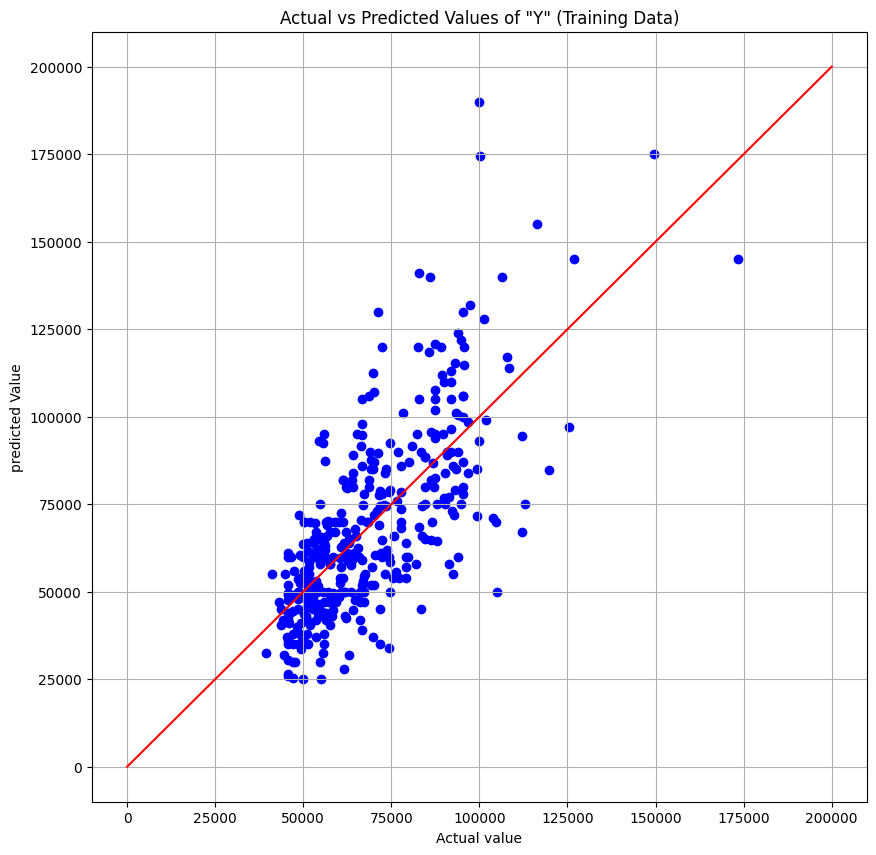

In [34]:
plt.figure(figsize = [10,10])

a = np.linspace(0, 200000, 100)
b = a

plt.scatter(y2_training, ytr, color='b')
plt.plot(a,b, 'r')
plt.xlabel('Actual value')
plt.ylabel('predicted Value')
plt.title('Actual vs Predicted Values of "Y" (Training Data)')
plt.grid()
plt.show()

In [35]:
y2_testing = [w.T @ x for x in Xts]
y2_testing

final_loss = 0
for y_initial, y_predicted in zip(yts, y2_testing):
  loss = (y_predicted - y_initial) ** 2
  final_loss = final_loss + loss

print("The average square loss value on testing data is:", final_loss)

The average square loss value on testing data is: 71119345154.71294


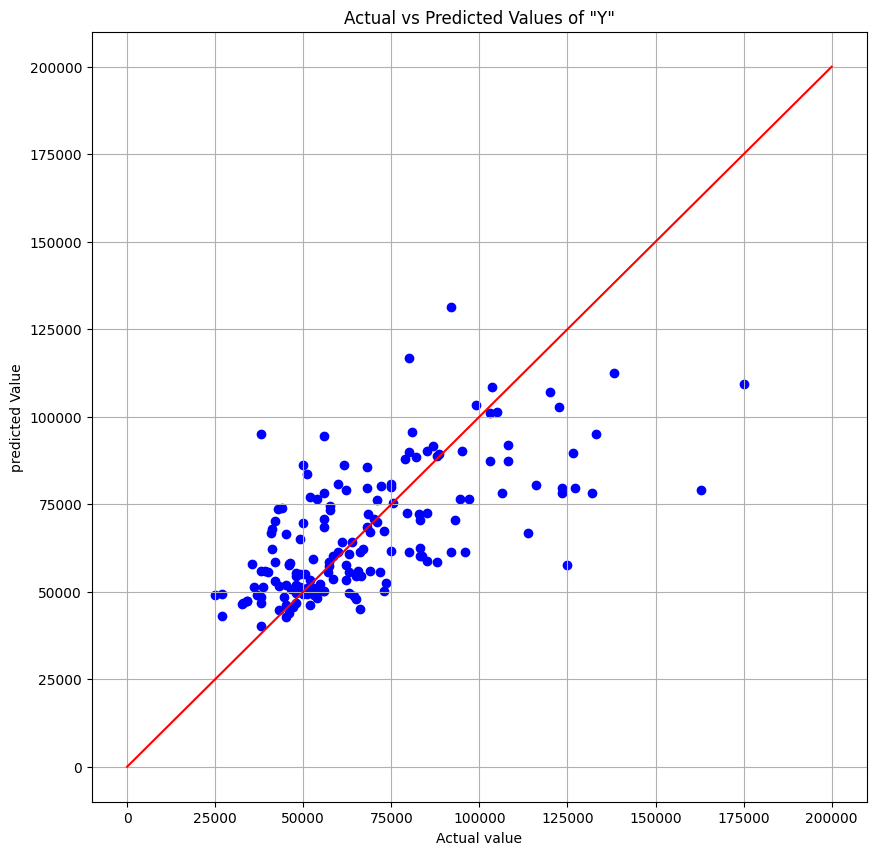

In [37]:
plt.figure(figsize = [10,10])

a = np.linspace(0, 200000, 100)
b = a

plt.scatter(yts, y2_testing, color='b')
plt.plot(a,b,'r')
plt.xlabel('Actual value')
plt.ylabel('predicted Value')
plt.title('Actual vs Predicted Values of "Y"')
plt.grid()
plt.show()